In [152]:
import numpy as np
import scipy.io as si
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [178]:
data_path = '/Users/darinmomayezi/Documents/School/Centuri Summer School/Computational Neuroscience/data/'
dataset1 = si.loadmat(data_path + 'Dataset1.mat')
header, version, globals, directions, R = dataset1['__header__'], dataset1['__version__'], dataset1['__globals__'], dataset1['direction'], dataset1['R']
neurons, trials = R.shape

Text(0.5, 0.98, 'Firing Rate of Neurons [0, 1, 2] for Each Direction')

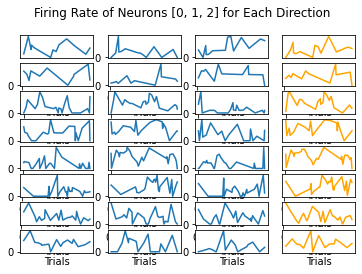

In [184]:
# Can we predict direction from neurons?
neuron_list = [0, 1, 2]  # neurons of interest
figs1, axs1 = plt.subplots(nrows=directions[-1][0], ncols=len(neuron_list)+1)
direction_trial_dict = {}  # trials where each direction appears
for trial, direction in enumerate(directions):
    direction = direction[0]
    if direction not in list(direction_trial_dict.keys()):
        direction_trial_dict[direction] = [trial]
    else:
        direction_trial_dict[direction].append(trial)
        
directional_addition_dict = {}
for neuron_index, neuron in enumerate(neuron_list):
    for direction, trial_list in direction_trial_dict.items():
        firing_rates = []
        for trial in trial_list:
            firing_rates.append(R[neuron][trial])
        axs1[direction-1, neuron_index].plot(trial_list, firing_rates)
        axs1[direction-1, neuron_index].set_xlabel('Trials')
        axs1[direction-1, neuron_index].set_yticks([0])
        axs1[direction-1, neuron_index].set_xticks([0])
        if direction not in directional_addition_dict.keys():
            directional_addition_dict[direction] = firing_rates
        else:
            directional_addition_dict[direction] = [np.mean(x) for x in zip(directional_addition_dict[direction], firing_rates)]
for direction, summed_firing_rates in directional_addition_dict.items():
    trial_list = direction_trial_dict[direction]
    axs1[direction-1, -1].plot(trial_list, summed_firing_rates, color='orange')
    axs1[direction-1, -1].set_xlabel('Trials')
    axs1[direction-1, -1].set_yticks([0])
    axs1[direction-1, -1].set_xticks([0])
figs1.suptitle(f'Firing Rate of Neurons {neuron_list} for Each Direction')


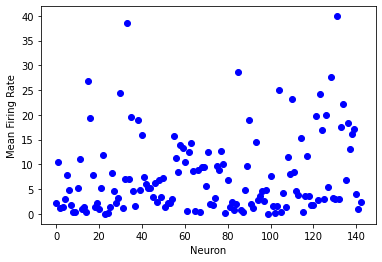

In [180]:
# Mean firing rate for each neuron
for neuron in range(neurons):
    firing_rate = R[neuron]
    mean_firing_rate = np.mean(firing_rate)
    plt.plot(neuron, mean_firing_rate, marker='o', color='blue')
    plt.xlabel('Neuron')
    plt.ylabel('Mean Firing Rate')
    

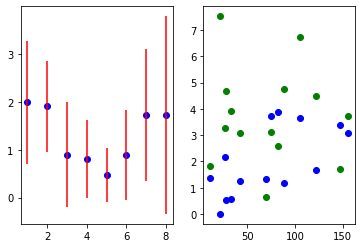

In [181]:
# Directional mean firing rate
figs3, axs3 = plt.subplots(nrows=1, ncols=2)
direction_list = np.linspace(1, 8, 8, dtype=int)
neuron = 2  # neuron of interest
for direction in direction_list:
    direction_firing_rates = []
    for trial, direction_recorded in enumerate(directions):
        if direction_recorded == direction:
            firing_rate = R[neuron][trial]
            direction_firing_rates.append(firing_rate)
    
    mean_directional_firing_rate = np.mean(direction_firing_rates)
    std = np.std(direction_firing_rates, axis=0)
    axs3[0].plot(direction, mean_directional_firing_rate, marker='o', color='blue')
    axs3[0].errorbar(direction, mean_directional_firing_rate, xerr=0, yerr=std, color='red')
    
# axs[0].xlabel('Directions')
# axs[0].ylabel('Mean Firing Rate')            
# axs[0].title(f'Neuron {neuron}')

# Can we predict direction from directional mean firing rate of one neuron ?
# Is there a unique firing rate for each direction for amongst all the neurons ?
# Plot firing rate of all neurons for each direction

directional = 1  # direction of interest
neuron1 = 2
direction_trial_dict = {}  # trials where each direction appears
for trial, direction in enumerate(directions):
    direction = direction[0]
    if direction not in list(direction_trial_dict.keys()):
        direction_trial_dict[direction] = [trial]
    else:
        direction_trial_dict[direction].append(trial)

for trial in direction_trial_dict[directional]:
    axs3[1].plot(trial, R[neuron1][trial], marker='o', color='blue')
    
# One neuron does not consistently predict direction based on firing rate
# Let's try two neurons
neuron2 = 0
for trial in direction_trial_dict[directional]:
    axs3[1].plot(trial, R[neuron2][trial], marker='o', color='green')
        



Text(0, 0.5, 'Neuron 1')

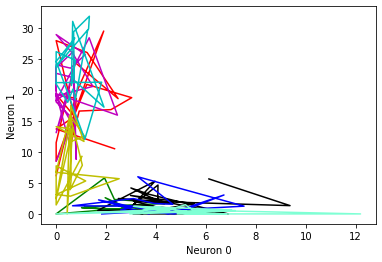

In [182]:
fig2 = plt.subplot()

neuronals = [0, 1]
color_dict = {1: 'b', 2: 'g', 3: 'r', 4: 'c', 5: 'm', 6: 'y', 7: 'k', 8: 'aquamarine'}
for direction, trial_list in direction_trial_dict.items():
    neuron1 = []
    neuron2 = []
    for trial in trial_list:
        neuron1.append(R[neuronals[0]][trial])
        neuron2.append(R[neuronals[1]][trial])
    fig2.plot(neuron1, neuron2, color=color_dict[direction])
fig2.set_xlabel(f'Neuron {neuronals[0]}')
fig2.set_ylabel(f'Neuron {neuronals[1]}')

In [183]:
# PCA
R_prime = normalize(R)
pca = PCA(n_components=40, svd_solver='full')
pca.fit(R_prime)
explained = pca.explained_variance_ratio_
print(sum(explained))

0.849242117260825
